In [ ]:
!pip install timm==0.6.7
!pip install moviepy==0.2.3.5 imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 KB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=e348ef5b56818f4302ab26c2a12feddc6af48044ddd5622b9697fe807ce7da8b
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
%cd /content
!git clone https://github.com/HSE-asavchenko/face-emotion-recognition.git
%cd /content/face-emotion-recognition
# Commits on Dec 17, 2022使用
!git checkout bc7d6485ffe34afbb4aa68ecf46bdbcca34cb945

/content
Cloning into 'face-emotion-recognition'...
remote: Enumerating objects: 542, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 542 (delta 27), reused 64 (delta 19), pack-reused 457
Receiving objects: 100% (542/542), 476.66 MiB | 17.47 MiB/s, done.
Resolving deltas: 100% (216/216), done.
Checking out files: 100% (87/87), done.
/content/face-emotion-recognition
Note: checking out 'bc7d6485ffe34afbb4aa68ecf46bdbcca34cb945'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at bc7d648 Update README.md


In [ ]:
%cd /content/face-emotion-recognition/src

import os
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
from tqdm import tqdm
from google.colab import files

from moviepy.editor import *
from moviepy.video.fx.resize import resize

import torch
from torchvision import transforms

from facial_analysis import FacialImageProcessing

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using device:', DEVICE)

/content/face-emotion-recognition/src
Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)4259840/45929032 bytes (9.3%)8478720/45929032 bytes (18.5%)12746752/45929032 bytes (27.8%)17055744/45929032 bytes (37.1%)21389312/45929032 bytes (46.6%)25468928/45929032 bytes (55.5%)29876224/45929032 bytes (65.0%)34209792/45929032 bytes (74.5%)37511168/45929032 bytes (81.7%)41533440/45929032 bytes (90.4%)45809664/45929032 bytes (99.7%)45929032/45929032 byt

In [ ]:
%cd /content/face-emotion-recognition/src
# インデックスと分類クラスの対応表(dict)
idx_to_class = {
    0: 'Anger',     # 怒り
    1: 'Contempt',  # 軽蔑
    2: 'Disgust',   # 嫌悪感
    3: 'Fear',      # 恐れ
    4: 'Happiness', # 幸福
    5: 'Neutral',   # ニュートラル
    6: 'Sadness',   # 悲しみ
    7: 'Surprise'   # 驚き
    }


IMG_SIZE = 260
MODEL_PATH = '/content/face-emotion-recognition/models/affectnet_emotions/enet_b2_8.pt'

/content/face-emotion-recognition/src


In [ ]:
imgProcessing = FacialImageProcessing(False)

img_transforms = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ]
)

In [ ]:
model = torch.load(MODEL_PATH)
model=model.to(DEVICE)
model.eval()

EfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=

In [ ]:
%cd /content/face-emotion-recognition/src

!wget -c https://www.pakutaso.com/shared/img/thumb/kuchikomi1134_TP_V4.jpg \
      -O ../test_images/angry.jpg

!wget -c https://www.pakutaso.com/shared/img/thumb/AL003-ocyaitadakujyoushi20140722_TP_V4.jpg \
      -O ../test_images/two_persons.jpg

/content/face-emotion-recognition/src
--2023-01-16 15:31:56--  https://www.pakutaso.com/shared/img/thumb/kuchikomi1134_TP_V4.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 180.235.251.31
Connecting to www.pakutaso.com (www.pakutaso.com)|180.235.251.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73768 (72K) [image/jpeg]
Saving to: ‘../test_images/angry.jpg’

../test_images/angr 100%[===================>]  72.04K  --.-KB/s    in 0.07s   

2023-01-16 15:31:56 (1006 KB/s) - ‘../test_images/angry.jpg’ saved [73768/73768]

--2023-01-16 15:31:56--  https://www.pakutaso.com/shared/img/thumb/AL003-ocyaitadakujyoushi20140722_TP_V4.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 180.235.251.31
Connecting to www.pakutaso.com (www.pakutaso.com)|180.235.251.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55115 (54K) [image/jpeg]
Saving to: ‘../test_images/two_persons.jpg’

../test_images/two_ 100%[===================>]  53.82K  --

In [ ]:
def predict(input_file_path, text_size=None, print_time=False):
  # 画像をOpenCV2でロード
  frame_bgr = cv2.imread(input_file_path)
  # BGR->RGB
  frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
  # 顔検出
  bounding_boxes, points = imgProcessing.detect_faces(frame)
  # 描画文字サイズ算出
  if text_size == None:
    h, w, _ = frame.shape
    text_size = w/800

  points = points.T
  for bbox,p in zip(bounding_boxes, points):
    # 顔画像取得
    box = bbox.astype(np.int64)
    x1,y1,x2,y2 = box[0:4]    
    face_img = frame[y1:y2,x1:x2,:]
    
    # 前処理
    img_tensor = img_transforms(Image.fromarray(face_img))
    img_tensor.unsqueeze_(0)

    # Facial Expression Recognition
    if print_time:
      start = time.time()
    scores = model(img_tensor.to(DEVICE))
    if print_time:
      end = time.time()
      print('processing time: %2f ms'% ((end - start)*1000.))

    # 予測結果描画
    scores=scores[0].data.cpu().numpy()

    # 検出した顔の矩形を描画
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), thickness = 2)
    # 表情認識結果を描画
    text = idx_to_class[np.argmax(scores)]
    # 視認性を上げるため白字で文字の外枠を囲む
    cv2.putText(frame, text, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, text_size, (255, 255, 255), thickness=9)
    cv2.putText(frame, text, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 0, 0), thickness=5)

  return frame, scores

/content/face-emotion-recognition/src
processing time: 94.911575 ms
processing time: 18.555403 ms
processing time: 17.496347 ms
processing time: 17.338037 ms
processing time: 18.425703 ms
processing time: 17.652512 ms


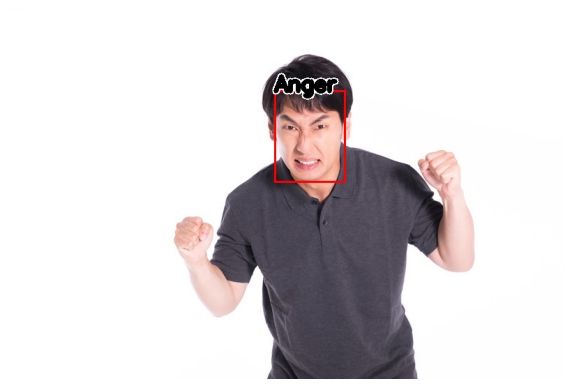

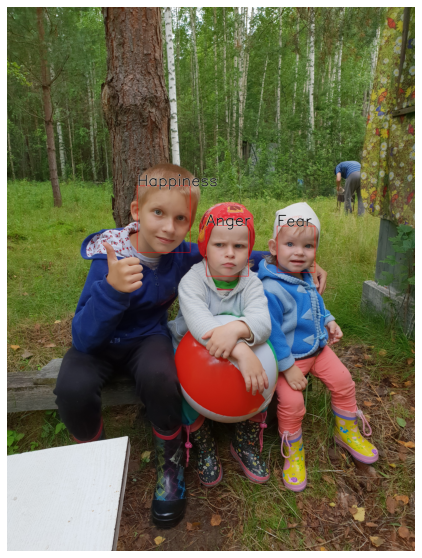

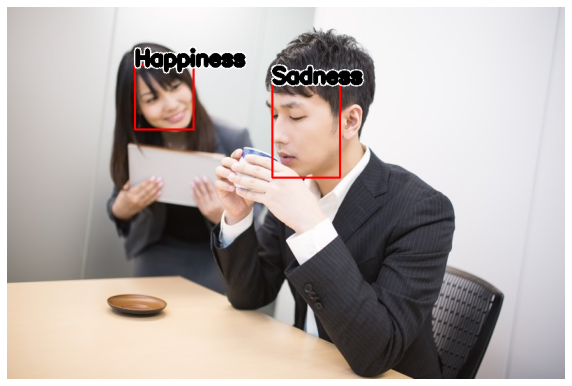

In [ ]:
%cd /content/face-emotion-recognition/src

input_imgs = glob.glob("../test_images/*.jpg")

for img_path in input_imgs:
  frame, scores = predict(img_path, text_size=None, print_time=True)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(frame)

In [ ]:
#@markdown 動画の切り抜き範囲(秒)を指定してください。\
#@markdown 30秒以上の場合OOM発生の可能性が高いため注意
start_sec =  1#@param {type:"integer"}
end_sec =  10#@param {type:"integer"}

In [ ]:
%cd /content/face-emotion-recognition
!rm -rf test_video
!mkdir -p test_video/frames
!mkdir -p test_video/outputs
%cd test_video

# 動画アップロード
uploaded = files.upload()
uploaded = list(uploaded.keys())
file_name = uploaded[0]

upload_path = os.path.join("/content/face-emotion-recognition/test_video", file_name)
print("upload file here:", upload_path)

/content/face-emotion-recognition
/content/face-emotion-recognition/test_video


Saving 俺の顔.mp4 to 俺の顔.mp4
upload file here: /content/face-emotion-recognition/test_video/俺の顔.mp4


In [ ]:
subclip_path = "/content/face-emotion-recognition/test_video/subclip.mp4"

with VideoFileClip(upload_path) as video:
    subclip = video.subclip(start_sec, end_sec)
    subclip.write_videofile(subclip_path)

[MoviePy] >>>> Building video /content/face-emotion-recognition/test_video/subclip.mp4
[MoviePy] Writing audio in subclipTEMP_MPY_wvf_snd.mp3


100%|██████████| 199/199 [00:00<00:00, 870.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/face-emotion-recognition/test_video/subclip.mp4



100%|██████████| 270/270 [00:30<00:00,  8.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/face-emotion-recognition/test_video/subclip.mp4 



In [ ]:
!ffmpeg -i {subclip_path} frames/%06d.png

frames = glob.glob("/content/face-emotion-recognition/test_video/frames/*.png")
print("num of frames:", len(frames))

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
start = time.time()

# フレーム画像すべてをFacial Expression Recognition
for img_path in tqdm(frames):
  frame, scores = predict(img_path, text_size=1.0)
  save_path = os.path.join(
      "/content/face-emotion-recognition/test_video/outputs",
      os.path.basename(img_path) )

  # RGB->BGR
  cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

end = time.time()
print('processing time: %2f sec'% ((end - start)))

100%|██████████| 270/270 [01:40<00:00,  2.69it/s]

processing time: 100.294102 sec


In [ ]:
!ffmpeg -i "/content/face-emotion-recognition/test_video/outputs/%06d.png" \
        -c:v libx264 -vf "format=yuv420p" "/content/face-emotion-recognition/test_video/outputs/result.mp4"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
clip = VideoFileClip("/content/face-emotion-recognition/test_video/outputs/result.mp4")
clip = resize(clip, height=640)
clip.ipython_display()

Output hidden; open in https://colab.research.google.com to view.

# 新しいセクション